In [7]:
import codecs
import os
from collections import defaultdict

input_path = "D:\\課業相關\\論文資料\\SVM\\condicate_author\\"

author_num = defaultdict(dict)

for file in os.listdir(input_path):
    title = file.split('_')[0]
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline()
        number = len(f.readline().strip().split())
        
        author_num[title][file] = number

for i in author_num:
    author_sort = sorted(author_num[i].items(), key=lambda d:d[1], reverse = True)
    print (i,len(author_num[i]))
    
    d_len = [y for x,y in author_sort]
    print ('MAX:',max(d_len))
    print ('Min:',min(d_len))
    print ('Mean:',round(sum(d_len)/len(d_len),3))
    print ('小於500:',len([y for x,y in author_sort if y <= 500]))
    print ('大於1000:',len([y for x,y in author_sort if y >= 1000]))
    print ('大於2000:',len([y for x,y in author_sort if y >= 2000]))
    print ()
    
print ('END')

夏道平 63
MAX: 6726
Min: 581
Mean: 2005.794
小於500: 0
大於1000: 60
大於2000: 24

龍平甫 41
MAX: 8488
Min: 1409
Mean: 5392.683
小於500: 0
大於1000: 41
大於2000: 40

殷海光 80
MAX: 13322
Min: 887
Mean: 4192.738
小於500: 0
大於1000: 79
大於2000: 75

傅正 48
MAX: 9717
Min: 1219
Mean: 2899.021
小於500: 0
大於1000: 48
大於2000: 30

雷震 89
MAX: 17157
Min: 236
Mean: 4283.404
小於500: 1
大於1000: 88
大於2000: 66

胡適 27
MAX: 8094
Min: 232
Mean: 2414.333
小於500: 2
大於1000: 23
大於2000: 15

朱伴耘 29
MAX: 8546
Min: 198
Mean: 5488.828
小於500: 1
大於1000: 28
大於2000: 26

蔣勻田 30
MAX: 8556
Min: 170
Mean: 3921.533
小於500: 3
大於1000: 27
大於2000: 25

羅鴻詔 26
MAX: 8072
Min: 1787
Mean: 4581.577
小於500: 0
大於1000: 26
大於2000: 25

END


In [8]:
#小於1000詞的文章觀看
from IPython.display import clear_output
for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline()
        content = f.readline().strip().split()
        if len(content) <= 500:
            print (len(content),file)
            print (head)
            print (''.join([i.split('(')[0] for i in content]))
            
            find = input()
            if find == '':
                clear_output()
            else:
                break

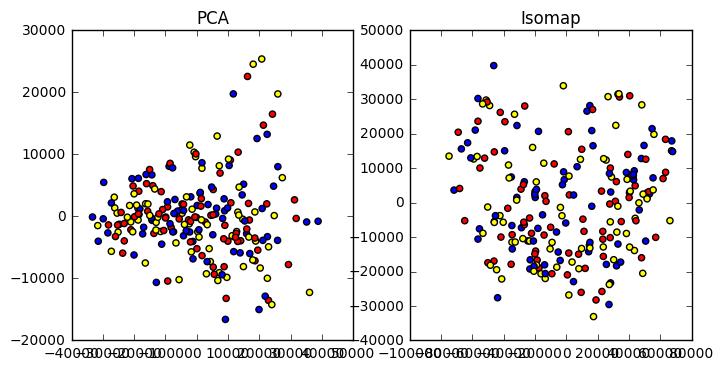

In [47]:
no_path = "D:\\課業相關\\論文資料\\stop.txt"

feature = [] #特徵
with codecs.open(no_path,'rb','utf8') as f:
    for i in f.readlines():
        if i.strip() != '':
            feature.append(i.strip())

def line_vec(line):
    temp_feature = defaultdict(int)
    
    for i in line:
        if i.split('(')[0] in feature:
            temp_feature[i.split('(')[0]] += 1
    return temp_feature
            
X = []
y = []

for file in os.listdir(input_path):
    if '殷海光' in file:
        with codecs.open(input_path+file,'rb','utf8') as f:
            head = f.readline()
            content = f.readline().strip().split()
            mid = int(len(content)/2)
            
            if len(content) > 2000:
                a1 = line_vec(content)
                X.append([round(a1[x] * 1000000 / len(content),3) for x in feature])
                y.append('red')
                
                b1 = line_vec(content[:mid])
                b2 = line_vec(content[mid:])
                X.append([round(b1[x] * 1000000 / len(content[:mid]),3) for x in feature])
                X.append([round(b2[x] * 1000000 / len(content[mid:]),3) for x in feature])
                y.append('yellow')
                y.append('blue')
            
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  
from sklearn.manifold import Isomap
from sklearn.preprocessing import scale

#X = scale(X)

X_reduced = PCA(n_components=2).fit_transform(X)
X_iso = Isomap(n_neighbors=5).fit_transform(X)

#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color=y)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
ax[0].set_title('PCA')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y)
ax[1].set_title('Isomap')

plt.show()